In [2]:
from skimage import data, io, filters
from skimage.color import rgb2hed, hed2rgb
from skimage.util import img_as_ubyte
from PIL import Image
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import numpy as np
Image.MAX_IMAGE_PIXELS = None

In [3]:
gene_name = "OCIAD2"
ish_image = io.imread('images/auto{0}/298804416_ISH_OCIAD2.jpg'.format(gene_name))
tumor_annotation_image = io.imread('images/auto{0}/298804416_Annotation_OCIAD2.jpg'.format(gene_name))

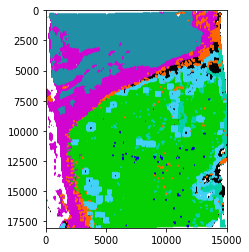

In [4]:
plt.imshow(tumor_annotation_image)

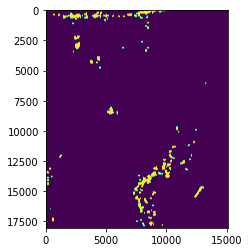

In [8]:
# Tumor Annotation Regions
leading_edge_mask = (tumor_annotation_image[:, :, 0] < 50) & (tumor_annotation_image[:, :, 1] > 100) & (tumor_annotation_image[:, :, 1] < 180) & (tumor_annotation_image[:, :, 2] > 150) & (tumor_annotation_image[:, :, 2] < 200)
infiltrating_tumor_mask = (tumor_annotation_image[:, :, 0] > 200) & (tumor_annotation_image[:, :, 1] < 100) & (tumor_annotation_image[:, :, 2] > 100)
cellular_tumor_mask = (tumor_annotation_image[:, :, 0] < 100) & (tumor_annotation_image[:, :, 1] > 200) & (tumor_annotation_image[:, :, 2] < 150)
microvascular_proliferation_mask = (tumor_annotation_image[:, :, 0] > 200) & (tumor_annotation_image[:, :, 1] < 150) & (tumor_annotation_image[:, :, 2] < 150)
necrosis_mask = (tumor_annotation_image[:, :, 0] < 50) & (tumor_annotation_image[:, :, 1] < 50) & (tumor_annotation_image[:, :, 2] < 50)
perinecrotic_mask = (tumor_annotation_image[:, :, 0] < 80) & (tumor_annotation_image[:, :, 1] > 200) & (tumor_annotation_image[:, :, 2] > 230)
plt.imshow(microvascular_proliferation_mask)

In [5]:
# Generate ISH mask
# ish_mask = (ish_image[:, :, 0] < 220) & (ish_image[:, :, 1] > 200) & (ish_image[:, :, 2] > 180)
# ish_blurred = img_as_ubyte(filters.gaussian(ish_image, multichannel = True))
ish_mask = (ish_blurred[:, :, 0] < 220) & (ish_blurred[:, :, 1] > 200) & (ish_blurred[:, :, 2] > 180)
plt.imshow(ish_mask)

KeyboardInterrupt: 

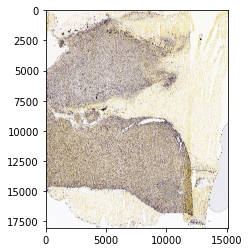

In [29]:
plt.imshow(ish_blurred)

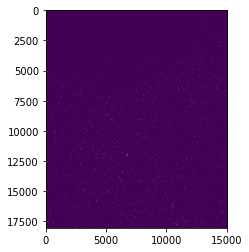

In [5]:
ish_mask = (np.abs(ish_image[:, :, 0] - 100) < 40) &\
               (np.abs(ish_image[:, :, 1] - 80) < 50) &\
               (np.abs(ish_image[:, :, 2]) < 150)
plt.imshow(ish_mask)

In [13]:
leading_edge_count = np.count_nonzero(np.logical_and(ish_mask, leading_edge_mask))
infiltrating_tumor_count = np.count_nonzero(np.logical_and(ish_mask, infiltrating_tumor_mask))
cellular_tumor_count = np.count_nonzero(np.logical_and(ish_mask, cellular_tumor_mask))
microvascular_proliferation_count = np.count_nonzero(np.logical_and(ish_mask, microvascular_proliferation_mask))
necrosis_count = np.count_nonzero(np.logical_and(ish_mask, necrosis_mask))
perinecrotic_count = np.count_nonzero(np.logical_and(ish_mask, perinecrotic_mask))
total_count = np.count_nonzero(ish_mask)
print("Counts\nLeading Edge:{0}({1}%)".format(leading_edge_count, round(leading_edge_count/total_count * 100, 3)))
print("Infiltrating Tumor:{0}({1}%)".format(infiltrating_tumor_count, round(infiltrating_tumor_count/total_count * 100, 3)))
print("Cellular Tumor:{0}({1}%)".format(cellular_tumor_count, round(cellular_tumor_count/np.count_nonzero(cellular_tumor_mask) * 100, 3)))
print("Microvascular Proliferation:{0}({1}%)".format(microvascular_proliferation_count, round(microvascular_proliferation_count/total_count * 100, 3)))
print("Necrosis:{0}({1}%)".format(necrosis_count, round(necrosis_count/total_count * 100, 3)))
print("Perinecrotic:{0}({1}%)".format(perinecrotic_count, round(perinecrotic_count/np.count_nonzero(perinecrotic_mask) * 100, 3)))

Counts
Leading Edge:1(0.0%)
Infiltrating Tumor:0(0.0%)
Cellular Tumor:1895793(1.84%)
Microvascular Proliferation:213302(6.675%)
Necrosis:76629(2.398%)
Perinecrotic:113161(1.568%)
